# Документация по matplotlib
* Google -> stackoverflow
* Официальная дока и галерия на [matplotlib.org](https://matplotlib.org)

# API "быстро и грязно"

<IPython.core.display.Javascript object>


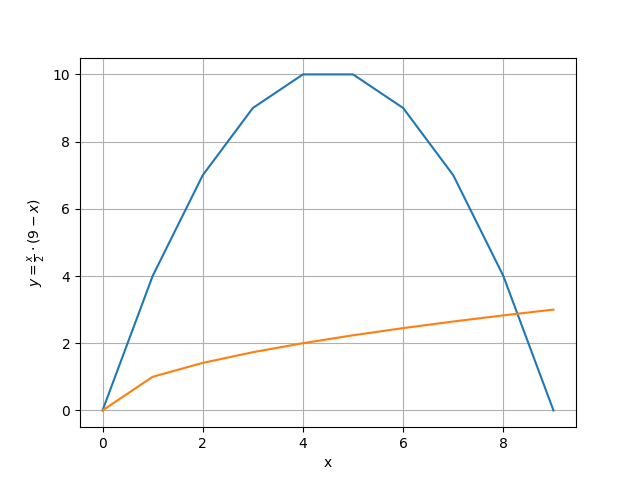

In [15]:
%matplotlib notebook

import matplotlib.pyplot as plt

x = range(10)
y = [i * (9 - i) / 2 for i in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel(r'$y = \frac{x}{2} \cdot (9 - x)$')
plt.grid()

# API "чуть менее быстро и грязно"

<IPython.core.display.Javascript object>


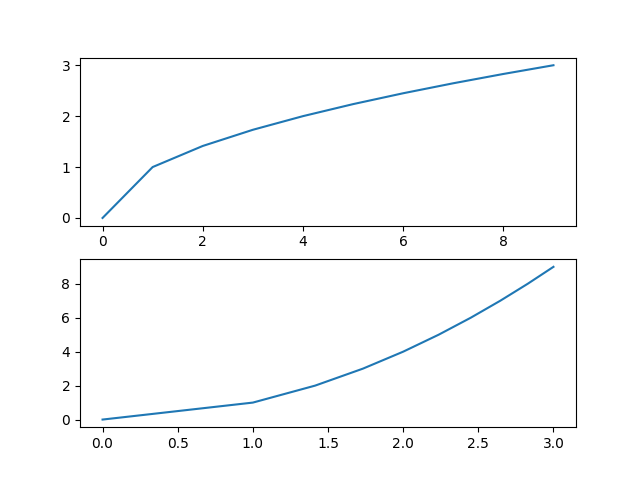

In [21]:
x = range(10)
y = [i ** 0.5 for i in x]

f = plt.figure()
ax1, ax2 = f.subplots(nrows=2)
ax1.plot(x, y)
ax2.plot(y, x)

In [26]:
from matplotlib import rc

rc('text', usetex=True)

<IPython.core.display.Javascript object>


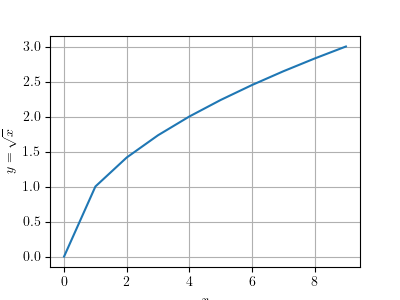

In [37]:
x = range(10)
y = [i ** 0.5 for i in x]

f = plt.figure(figsize=(4, 3))
ax = f.subplots()
ax.plot(x, y)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$y = \sqrt{x}$')
ax.grid()

In [38]:
f.savefig('p07_sqrt.png', dpi=200)
f.tight_layout()
f.savefig('p07_sqrt.pdf')

# Примеры

## Плотности нормального распределения

In [59]:
import random
import math

<IPython.core.display.Javascript object>


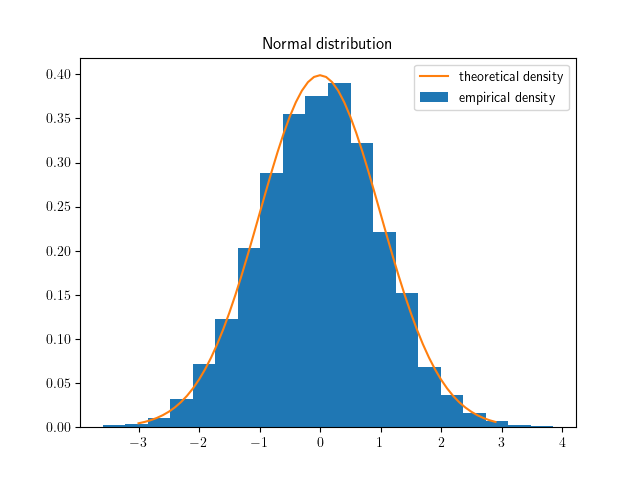

Text(0.5, 1.0, 'Normal distribution')

In [72]:
# Считаем выборку
samples = [random.gauss(0, 1) for _ in range(10000)]

# Считаем теоретическую плотность распределения
x = [i / 10 for i in range(-30, 30)]
y = [math.exp(- t ** 2 / 2) / math.sqrt(2 * math.pi) for t in x]


fig = plt.figure()
ax = fig.subplots()

# Строим эмпирическую плотность
ax.hist(samples, bins=20, density=True, label='empirical density')

# Строим теоретическую плотность
ax.plot(x, y, label='theoretical density')

ax.legend()
ax.set_title('Normal distribution')

## Асимптотики алгоритма вычисления чисел Фибоначчи

In [124]:
from functools import lru_cache
import time

def naive_fib(n):
    if n <= 1:
        return 1
    else:
        return naive_fib(n - 1) + naive_fib(n - 2)

    
@lru_cache(maxsize=4)
def fib(n):
    if n <= 1:
        return 1
    else:
        return fib(n - 1) + fib(n - 2)  

In [84]:
%%time

naive_fib(35)

CPU times: user 3 s, sys: 0 ns, total: 3 s
Wall time: 3 s


14930352

In [85]:
%%time

fib(35)

CPU times: user 75 µs, sys: 0 ns, total: 75 µs
Wall time: 83.7 µs


14930352

In [132]:
def measure_agorithm_times(algo, numbers):
    """
    Измерить время работы алгоритма
    
    Parameters
    ----------
    algo
      Функция, представляющая собой алгоритм.
    
    numbers
      Коллекция с входными числами для алгоритма. Точки измерений.
    
    Returns
    -------
    Итератор с временами работы алгоритма.
    """
    
    for n in numbers:
        start_time = time.time()
        algo(n)
        yield time.time() - start_time

In [107]:
naive_fib_ns = list(range(5, 36, 5))
naive_fib_times = list(measure_agorithm_times(naive_fib, fib_ns))

In [130]:
fib(300)
fib_ns = list(range(300, 500, 10))
fib_times = list(measure_agorithm_times(fib, fib_ns[::-1]))[::-1]

<IPython.core.display.Javascript object>


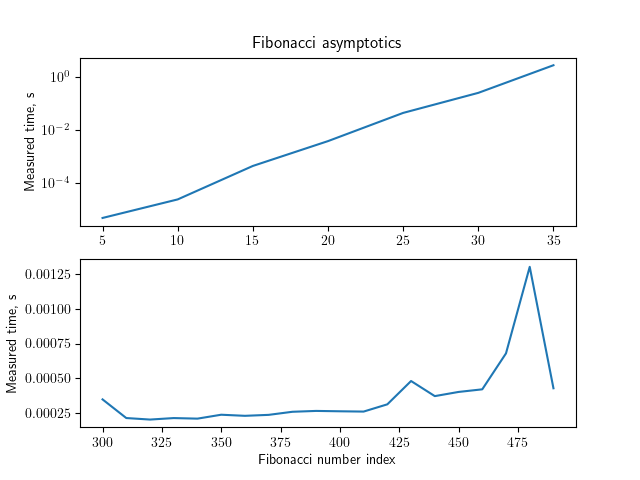

In [133]:
fig = plt.figure()
ax1, ax2 = fig.subplots(nrows=2)
ax1.plot(naive_fib_ns, naive_fib_times, label=r'w/o cache')
ax1.set_yscale('log')
ax1.set_ylabel('Measured time, s')

ax2.plot(fib_ns, fib_times, label='with cache')
ax2.set_xlabel('Fibonacci number index')
ax2.set_ylabel('Measured time, s')

ax1.set_title('Fibonacci asymptotics')

pass